In [19]:
import numpy as np
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt

In [20]:
def bin_to_dec(b_str):
    if len(b_str) > 1:
        return int(b_str[0])*2**(len(b_str)-1) + bin_to_dec(b_str[1:])
    else:
        return int(b_str[0])

In [21]:
#Read state sequence
seq = []
with open("data/state_evol_0025.dat", "r") as fdata:
    for line in fdata:
        v = line.split()
        seq.append(bin_to_dec(v[1]))
seq = np.array(seq)
print(seq)

[ 0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2
  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2
  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2
  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2
  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2
  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2
  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2
  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2
  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2
  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2
  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2
  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2
  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2
  0 10  5  2  0 10  5  2  0 10  5  2  0 10  5  2  0

(150.0, 200.0)

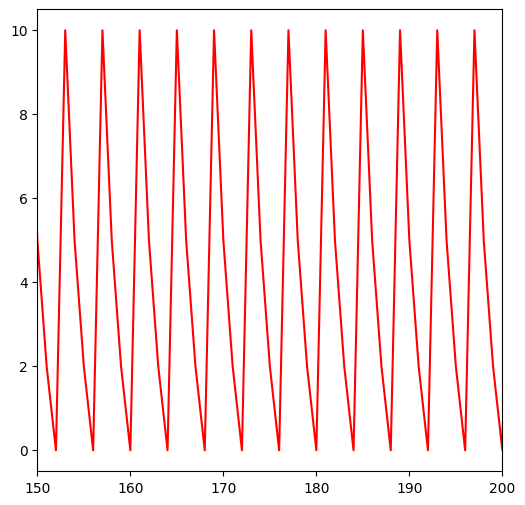

In [22]:
fig1, ax = plt.subplots(figsize=(6,6))
ax.plot(range(len(seq)),seq,'r')
ax.set_xlim([150,200])

In [23]:
X = fft(seq)
sr = 1  #sampling rate

N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

<StemContainer object of 3 artists>

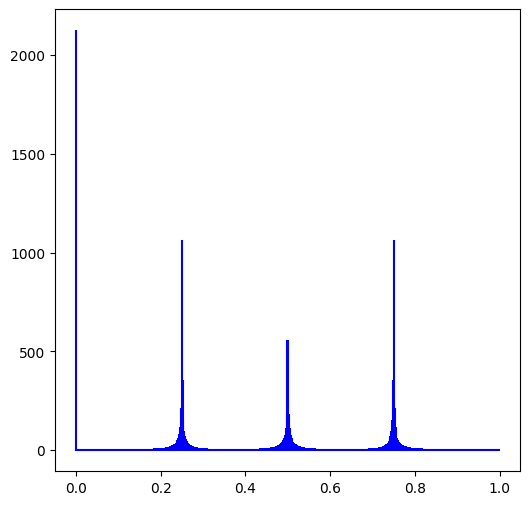

In [24]:
fig1, ax = plt.subplots(figsize=(6,6))
ax.stem(freq,np.abs(X),'b',markerfmt='',basefmt='-b')

<StemContainer object of 3 artists>

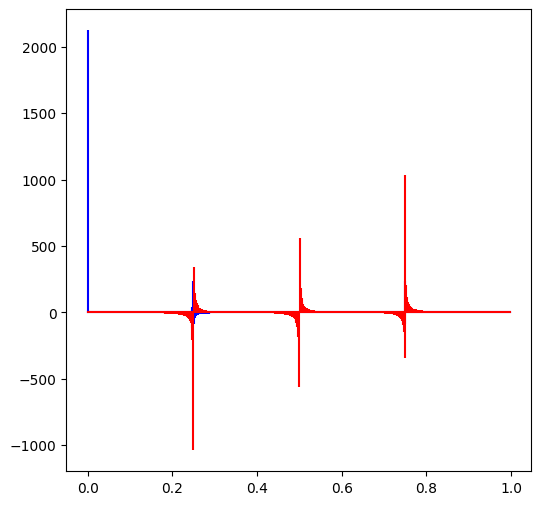

In [25]:
fig2, ax = plt.subplots(figsize=(6,6))
ax.stem(freq,np.real(X),'b',markerfmt='',basefmt='-b')
ax.stem(freq,np.imag(X),'r',markerfmt='',basefmt='-r')

In [26]:
freq[list(np.abs(X[1:])).index(max(np.abs(X[1:])))]

np.float64(0.24750499001996007)

In [27]:
with open("serie1.csv", "w") as f:
    for i in seq:
        f.write("{0}, ".format(i))